*Supporting textbook chapters for week 8: §§ 9.3.3, 9.3.4*

Lecture 9, topics:
* Stability,
* Implicit and Crank-Nicolson methods,
* Spectral methods.

# Reminders

## Classifying PDEs

$$ \alpha\frac{\partial^2 \phi}{\partial x^2} + \beta\frac{\partial^2 \phi}{\partial x\partial y} + \gamma\frac{\partial^2 \phi}{\partial y^2} + \delta\frac{\partial\phi}{\partial x} + \varepsilon \frac{\partial\phi}{\partial y} = f.$$

Classification based on $$ \Delta = \beta^2 - 4\alpha \gamma.$$

1. $\Delta = 0$: parabolic PDE,
3. $\Delta < 0$: elliptic PDE,
2. $\Delta > 0$: hyperbolic PDE.

![By Pbroks13 [CC BY 3.0  (https://creativecommons.org/licenses/by/3.0)], from Wikimedia Commons](500px-Conic_sections_with_plane.png)

1. Canonical parabolic PDE: the diffusion equation, $\ \displaystyle \kappa \nabla^2 \phi  - \frac{\partial T}{\partial t} = 0$,
3. Canonical elliptic PDE: the Poisson equation, $\ \nabla^2 \phi = \rho$,
2. Canonical hyperbolic PDE: the wave equation, $\ \displaystyle c^2 \nabla^2 \phi  - \frac{\partial^2 T}{\partial t^2} = 0.$

## Calculating the second derivative

* Recall central difference calculation of 2nd derivative (§5.10.5):
$$f''(x) = \frac{f(x+h) - 2f(x)+ f(x-h)}{h^2} - \frac{1}{12}h^2 f^{(4)}(x) + \dots{}$$

## General approach

* Discretize system spatially and temporally. Can use
    * Finite difference
    * Spectral coefficients
    * Etc.
* $\Rightarrow$ set of coupled ODEs that you need to solve in an efficient way.
* Spatial derivatives bring information in from neighbouring points $\Rightarrow$ coupling,
* $\Rightarrow$ errors depend on space and time and can get wave-like characteristics.

* Elliptical equations (e.g., Poisson eqn.):
    * Jacobi relaxation (always stable),
    * Speed-up with overrelaxation (not always stable),
    * Gauss-Seidel (overrelaxed or not): replace on the fly; more stable than Jacobi when overrelaxing.
* Parabolic PDEs (e.g., heat eqn):
    * FTCS (Forward Time, Centred Space) scheme: centred finite-diff. in space, forward Euler in time
    * Von Neumann analysis says stable if sufficient resolution space.
* Hyperbolic PDEs (e.g., wave eqn.):
    * Von Neumann analysis says FTCS never stable.
    * See [this] week for better schemes.
* Von Neumann stability analysis: plug a Fourier mode, see if it grows or not.

**Today: stable and accurate schemes for Hyperbolic PDEs?**

# The implicit method

We have other choices on how to discretize in time the set of ODEs
$$\frac{d\phi_m}{dt} = \psi_m, \quad \text{and}\quad \frac{d\psi_m}{dt} = \frac{c^2}{a^2}\left(\phi_{m+1} - 2\phi_m + \phi_{m-1}\right)$$

What if we evaluated the RHS at time $t+h$ instead of $t$?

Explicit method we saw last time was

$$
    \begin{bmatrix}
        \phi_m^{n+1} \\
        \psi_m^{n+1}
    \end{bmatrix}
    = 
    \begin{bmatrix}
        1 & +h \\
        -\frac{2hc^2}{a^2} & 1
    \end{bmatrix}
    \begin{bmatrix}
        \phi_m^{n} \\
        \psi_m^{n}
    \end{bmatrix}
    +
    \begin{bmatrix}
        0 \\
        \frac{c^2 h}{a^2}\left(\phi_{m+1}^n + \phi_{m-1}^n\right)
    \end{bmatrix}
$$

To compute with the implicit method, 
* first do $h\to -h$:
    \begin{align*}
        \phi_m^{n-1} & = \phi_m^{n} - h\psi_m^{n},\\
        \psi_m^{n-1} & = \psi_m^{n} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right),
    \end{align*}

* Then, $n \to n+1$ (one shift forward in time):
    \begin{align*}
        \phi_m^{n} & = \phi_m^{n+1} - h\psi_m^{n+1},\\
        \psi_m^{n} & = \psi_m^{n+1} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right),
    \end{align*}
    or 
    $$
    \begin{bmatrix}
        \phi_m^n \\
        \psi_m^n
    \end{bmatrix}
    = 
    \begin{bmatrix}
        1 & -h \\
        +\frac{2hc^2}{a^2} & 1
    \end{bmatrix}
    \begin{bmatrix}
        \phi_m^{n+1} \\
        \psi_m^{n+1}
    \end{bmatrix}
    -
    \begin{bmatrix}
        0 \\
        \frac{c^2 h}{a^2}\left(\phi_{m+1}^{n+1} + \phi_{m-1}^{n+1}\right)
    \end{bmatrix}
    $$

Why would we compute $n$ if we know $n+1$?

Because all RHS's combined (i.e., at all $m$'s) form is a matrix expression that we can invert to get the LHS.

## Stability

$$\text{Recall implicit step}\quad 
\begin{bmatrix}
    \phi_m^n \\
    \psi_m^n
\end{bmatrix}
= 
\begin{bmatrix}
    1 & -h \\
    +\frac{2hc^2}{a^2} & 1
\end{bmatrix}
\begin{bmatrix}
    \phi_m^{n+1} \\
    \psi_m^{n+1}
\end{bmatrix}
-
\begin{bmatrix}
    0 \\
    \frac{c^2 h}{a^2}\left(\phi_{m+1}^{n+1} + \phi_{m-1}^{n+1}\right)
\end{bmatrix}
$$

If we do the Von Neumann substitution, $\phi_m^n = \widehat \phi_k^n\exp(ikma)$ and $\psi_m^n =\widehat \psi_k^n\exp(ikma)$ (possible because eqns are linear), we get

$$
\mathbf B
\begin{bmatrix}
    \widehat\phi_k^{n+1} \\
    \widehat\psi_k^{n+1}
\end{bmatrix}=
\begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix},
$$

$$\text{with}\quad \mathbf B = 
\begin{bmatrix}
    1 & -h \\
    hr^2 & 1
\end{bmatrix}\quad \text{and}\quad
r = \frac{2c}{a}\sin\frac{ka}{2},
$$

$$
\Rightarrow
\begin{bmatrix}
    \widehat\phi_k^{n+1} \\
    \widehat\psi_k^{n+1}
\end{bmatrix}
=
\mathbf B^{-1}
\begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix}.
$$

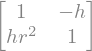

In [30]:
from sympy import *
init_printing()
h, r = symbols('h, r', positive=True)
B = Matrix([[1, -h], [h*r**2, 1]])
B 

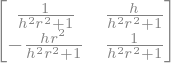

In [31]:
# inverse of B
B**-1

In [32]:
# eigenvalues as a list
L = list((B**-1).eigenvals().keys())

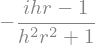

In [33]:
# First eigenvalue
L[0].factor()

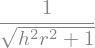

In [34]:
# Magnitude of first eigenvalue
abs(L[0].factor())

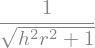

In [35]:
# Magnitude of 2nd eigenvalue
abs(L[1].factor())

$$\text{Recall}\quad
\begin{bmatrix}
    \widehat\phi_k^{m+1} \\
    \widehat\psi_k^{m+1}
\end{bmatrix}
=
\mathbf B^{-1}
\begin{bmatrix}
    \widehat\phi_k^{m} \\
    \widehat\psi_k^{m}
\end{bmatrix}.
$$
The eigenvalues of $\mathbf B^{-1}$ are $$\lambda_\pm = \frac{1\pm ihr}{1+h^2r^2}, \qquad |\lambda_\pm| = \frac{1}{\sqrt{1 + h^2r^2}} \leq 1.$$

* The eigenvalues are the growth factors and these are less than one.
* So the implicit method is unconditionally stable.
* But solutions decay exponentially! This is a big problem for the wave equation!

# Crank-Nicolson

Crank-Nicolson: average of explicit (fwd Euler) and implicit methods

\begin{align*}
\text{Forward Euler, Explicit:}&\\
    \phi_m^{n+1} & = \phi_m^{n} + h\psi_m^{n},\\
    \psi_m^{n+1} & = \psi_m^{n} + h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).\\
    \text{Backward Euler, Implicit:}&\\
    \phi_m^{n+1} - h\psi_m^{n+1} & = \phi_m^n,\\
    \psi_m^{n+1} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right) & = \psi_m^{n}.\\
    \text{Crank-Nicholson (C-N):}& \\
    \phi_m^{n+1} - \frac{h}2\psi_m^{n+1} & = \phi_m^{n} + \frac{h}2\psi_m^{n},\\
    \psi_m^{n+1} - \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right) & = \psi_m^{n} + \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
\end{align*}

If we do the Von Neumann substitution, $\phi_m^n = \widehat \phi_k^n\exp(ikma)$ and $\psi_m^n = \widehat \psi_k^n\exp(ikma)$, we get

$$\mathbf{B'}
\begin{bmatrix}
    \widehat\phi_m^{n+1} \\
    \widehat\psi_m^{n+1}
\end{bmatrix}
=
\mathbf{A'}
\begin{bmatrix}
    \widehat\phi_m^{n} \\
    \widehat\psi_m^{n}
\end{bmatrix},
$$
or 
$$
\begin{bmatrix}
    \widehat\phi_m^{n+1} \\
    \widehat\psi_m^{n+1}
\end{bmatrix}
=
\mathbf{B'^{-1}A'}
\begin{bmatrix}
    \widehat\phi_m^{n} \\
    \widehat\psi_m^{n},
\end{bmatrix}
$$
with
$$
\mathbf{B'^{-1}A'}
= \frac{a}{1 + h^2 r'^2}
\begin{bmatrix}
    1 - h^2 r'^2 & 2 h \\
    -2hr'^2 & 1-h^2r'^2
\end{bmatrix},
\quad r' = \frac{c}{a}\sin\frac{ka}{2}
$$

Growth factors of Crank-Nicolson are eigenvalues of $\mathbf{B^{-1}A}$:
$$\lambda_\pm = \frac{1 \pm 2ihr' - h^2 r'^2}{1 + h^2 r'^2},\quad \boxed{|\lambda_\pm| = 1}.$$

* For Forward-Euler (Explicit), the growth factors are greater than one and the solution diverges.
* For Backward-Euler (Implicit), the growth factors are less than one and the solution decays to zero.
* For CN, the growth factors are one so the solution neither grows nor decays.
* It is also 2nd-order accurate in time, while both explicit and implicit methods are 1st-order accurate (*not shown but true*).

# Spectral methods

## General idea

* Find yourself a set of orthogonal functions forming a basis of your function space
    * $\sin$ if quantity is zero at boundaries (assuming $x=0, L$ are the boundaries) or function is odd w.r.t. midline of domain (assuming $x=0$ at midline),
    * $\cos$ if quantity has zero derivatives at boundaries (assuming $x=0, L$ are the boundaries) or function is even w.r.t. midline of domain (assuming $x=0$ at midline),
    * $\exp$ if quantity is periodic,
    * Chebyshev polynomials for more flexible combinations of boundary conditions or non-periodic, closed domains,
    * Hermite polynomials on the $(-\infty, \infty)$ real line,
    * Laguerre polynomials on the $(0, \infty)$ real half-line,
    * ...
* Project your initial conditions and forcing on that basis,
* Iterate in time for linear PDEs,
* Iterate in time, and do FFTs and iFFTs to compute the non-linear terms if PDEs are non-linear,

* We focus on $\sin$/$\cos$/$\exp$ bases, sometimes called "Fourier spectral methods" (*perhaps only by me*),
* Usually, all of these methods require computing FFTs (even for non-Fourier spectral methods),
* $\oplus$ FFTs: large cost of computing them, but a large return on investment usually:
    * linear PDEs: all modes oscillate independently, without coupling $\Rightarrow$ computing the FFTs of the initial conditions give you the solutions at all times,
    * non-linear PDEs: elliptic PDEs can be solved without the need of an iterative solver like relaxation method
       $$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = \rho;$$
       $$\binom{\phi}{\rho} = \sum_i\sum_j \binom{\widehat\phi_{ij}}{\widehat\rho_{ij}}\exp i(k_ix + l_jy), $$
       $$\text{Use orthogonality to project } \Rightarrow \widehat\phi_{ij} = -\frac{\widehat\rho_{ij}}{k_i^2 + l_j^2}$$
      and you are just one iFFT away form getting the solution $\Rightarrow$ no need to use an iterative solver!
      This is particularly useful with large sets of coupled PDEs, for which just one elliptic PDE can be the main bottleneck of a non-spectral implementation.
* $\ominus$ Spectral methods are really difficult to implement in complicated geometries.

# Practical implementation tricks

Periodic BCs are simpler, let's focus on them.
$$f = \sum_{n=-\infty}^{\infty} \hat f_n \exp(ik_n x) \Rightarrow \frac{\partial f}{\partial x} = \sum_{n=-\infty}^{\infty} ik_n \hat f_n \exp(ik_n x),$$
or, in shorthand,
$$\frac{\partial f}{\partial x} \to ik_n\hat f_n, \quad \frac{\partial^2 f}{\partial x^2} \to -k_n^2\hat f_n$$

Next are a couple of examples of how to implement it.

### First derivative

In [36]:
# Based on derivative_fft.py
# calculate derivative of a function using fourier transform method
# import required routines
from numpy import arange, exp, pi
from pylab import plot, legend, show, subplot, xlabel, ylabel, tight_layout
from numpy.fft import rfft, irfft
#define function and its derivative
def f(x):
    return exp(-(x-L/2)**2/Delta**2)
def dfdx(x):
    return exp(-(x-L/2)**2/Delta**2)*-2*(x-L/2)/Delta**2

# define problem parameters
L = 2.0
Delta = 0.1
nx = 200

# define x, f(x), f'(x)
x = arange(0, L, L/nx)

f = f(x)

f_derivative = dfdx(x)

In [37]:
# now do the same thing spectrally:
fhat = rfft(f)  # fourier transform
karray = arange(nx/2+1)*2*pi/L  # define k
fhat_derivative = complex(0, 1)*karray*fhat  # define ik*fhat
f_derivative_fft = irfft(fhat_derivative)  # and transform back

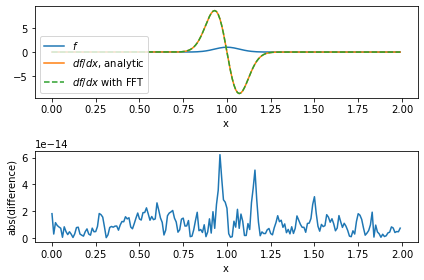

In [38]:
subplot(2, 1, 1)
plot(x, f, label='$f$')
plot(x, f_derivative, label='$df/dx$, analytic')
plot(x, f_derivative_fft, '--', label='$df/dx$ with FFT')
legend(loc=3)
xlabel('x')
subplot(2,1,2)
plot(x,abs(f_derivative-f_derivative_fft))
xlabel('x')
ylabel('abs(difference)')

tight_layout()
show()

### Second derivative

In [40]:
from pylab import plot, show, legend, subplot, xlabel, ylabel, tight_layout
from numpy import zeros, empty, linspace, exp, arange, minimum, pi, sin, cos, array
from dcst import dst, idst, dct, idct

N = 256
x = arange(N)*pi/N  # x = pi*n/N
f = sin(x) - 2*sin(4*x) + 3*sin(5*x) - 4*sin(6*x)  # function is a sine series
fCoeffs = dst(f)  # do fourier sine series
print('Original series: f = sin(x) - 2sin(4x) + 3sin(5x) - 4sin(6x)')
for j in range(7):
    print('Coefficient of sin({0}x): {1:.2e}'.format(j, fCoeffs[j]/N))

print('See Figure for calculating second derivative')

Original series: f = sin(x) - 2sin(4x) + 3sin(5x) - 4sin(6x)
Coefficient of sin(0x): 0.00e+00
Coefficient of sin(1x): 1.00e+00
Coefficient of sin(2x): 3.67e-17
Coefficient of sin(3x): -5.96e-16
Coefficient of sin(4x): -2.00e+00
Coefficient of sin(5x): 3.00e+00
Coefficient of sin(6x): -4.00e+00
See Figure for calculating second derivative


In [42]:
# Below: 2nd derivative also a sine series
d2f_dx2_a = -sin(x) + 32*sin(4*x) - 75*sin(5*x) + 144*sin(6*x)
DerivativeCoeffs = -arange(N)**2*fCoeffs  # 2nd derivative using Fourier transform
d2f_dx2_b = idst(DerivativeCoeffs)

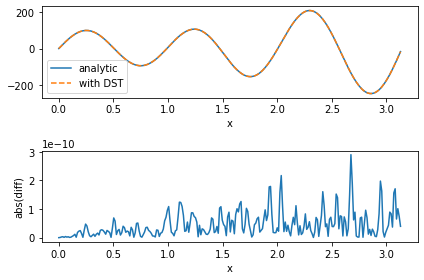

In [43]:
# plot
subplot(2, 1, 1) 
plot(x, d2f_dx2_a, label='analytic')
plot(x, d2f_dx2_b, '--', label='with DST')
xlabel('x')
legend()
subplot(2, 1, 2)
plot(x,abs(d2f_dx2_a - d2f_dx2_b))
xlabel('x')
ylabel('abs(diff)')
tight_layout()

# Summary

* Last week: FTCS was 
    * and explicit scheme,
    * unstable for hyperbolic PDEs (wave eqn.)
* FTCS with implicit time stepping:
    * infers what RHS of next step is based on present step, and inverts.
    * stable for hyperbolic PDEs, but decays (bad accuracy)
* Crank-Nicolson:
    * average of both, also requires matrix inversion,
    * neither grows nor decays
* Spectral methods:
    * leverage $\partial_x f \to ik\times\hat f$ and powerful FFT methods,
    * can be much faster than grid-based schemes (though it depends),
    * super-duper accurate
    * Not too flexible when it comes to domain shape.